### 中古マンションの価格予測


1　ライブラリのインポートと前処理

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
files = glob.glob('/content/drive/MyDrive/Colab Notebooks/data/train/train/*.csv')
data_list = []
for file in files:
    data_list.append(pd.read_csv(file,index_col=0))

<ipython-input-2-7a93a0391e96>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file,index_col=0))
<ipython-input-2-7a93a0391e96>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file,index_col=0))


In [3]:
#data_list  大変な量でバラバラになっている
df = pd.concat(data_list)


In [4]:
df.shape

(637351, 27)

In [5]:
#各データを前処理を行う
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 16008302 to 2029043
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   種類            637351 non-null  object 
 1   地域            0 non-null       float64
 2   市区町村コード       637351 non-null  int64  
 3   都道府県名         637351 non-null  object 
 4   市区町村名         637351 non-null  object 
 5   地区名           637060 non-null  object 
 6   最寄駅：名称        634732 non-null  object 
 7   最寄駅：距離（分）     614306 non-null  object 
 8   間取り           615609 non-null  object 
 9   面積（㎡）         637351 non-null  object 
 10  土地の形状         0 non-null       float64
 11  間口            0 non-null       float64
 12  延床面積（㎡）       0 non-null       float64
 13  建築年           619117 non-null  object 
 14  建物の構造         623423 non-null  object 
 15  用途            591214 non-null  object 
 16  今後の利用目的       275091 non-null  object 
 17  前面道路：方位       0 non-null       float64
 18  前

In [6]:
#axis=1　列、カラム中から改装という（左で指定したものを除外（Drop)することができる
#データが増えてきた場合、いちいち面倒である。そこで、０non-nullのものをカウントして、除外する
nonnull_list = []
for col in df.columns:
    nonnull = df[col].count()
    if nonnull == 0:
        nonnull_list.append(col)
#nonnull_list　除外されていることを確認
df = df.drop(nonnull_list,axis=1)

In [7]:
#多重共生性が問題　同一のものがないか確認
df["市区町村コード"].value_counts()

,count
市区町村コード,
13111,12269
13108,11591
13112,10747
13103,10580
13104,10055
...,...
21302,1
34309,1
4301,1


In [8]:
#市区町村名
#同一であることを確認
df["市区町村名"].value_counts()

,count
市区町村名,
大田区,12269
江東区,11591
世田谷区,10747
港区,10580
新宿区,10055
...,...
羽島郡岐南町,1
安芸郡坂町,1
刈田郡蔵王町,1


In [9]:
df = df.drop("市区町村名",axis=1)

In [10]:
#それぞれのカラムにおける統計量をみていこう
#df.describe()
df.astype("str").describe()

,種類,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
count,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351
unique,1,618,47,12047,3832,35,64,114,77,13,23,5,17,7,18,58,3,10,380
top,中古マンション等,13111,東京都,本町,nan,6,３ＬＤＫ,70,平成3年,ＲＣ,住宅,nan,商業地域,60.0,200.0,2014年第１四半期,未改装,nan,7.176091259055681
freq,637351,12269,190524,5267,2619,50928,272449,83443,21982,431050,583722,362260,172628,349347,293388,13561,419268,619076,20996


In [11]:
df = df.drop("種類",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 16008302 to 2029043
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   市区町村コード       637351 non-null  int64  
 1   都道府県名         637351 non-null  object 
 2   地区名           637060 non-null  object 
 3   最寄駅：名称        634732 non-null  object 
 4   最寄駅：距離（分）     614306 non-null  object 
 5   間取り           615609 non-null  object 
 6   面積（㎡）         637351 non-null  object 
 7   建築年           619117 non-null  object 
 8   建物の構造         623423 non-null  object 
 9   用途            591214 non-null  object 
 10  今後の利用目的       275091 non-null  object 
 11  都市計画          618786 non-null  object 
 12  建ぺい率（％）       614848 non-null  float64
 13  容積率（％）        614848 non-null  float64
 14  取引時点          637351 non-null  object 
 15  改装            580431 non-null  object 
 16  取引の事情等        18275 non-null   object 
 17  取引価格（総額）_log  637351 non-null  float64
dtypes

In [12]:
#OBJを数値型へ
pd.set_option("display.max_rows",100)
df["最寄駅：距離（分）"].value_counts()

,count
最寄駅：距離（分）,
6,50928
4,48883
5,45337
8,44277
3,42880
9,38379
7,32369
30分?60分,31999
10,31572


In [13]:
#replace
#値の1H？1H30は平均の値‘75’に変更
df_temp = df["最寄駅：距離（分）"].replace("1H?1H30",75)
df_temp.value_counts()

,count
最寄駅：距離（分）,
6,50928
4,48883
5,45337
8,44277
3,42880
9,38379
7,32369
30分?60分,31999
10,31572


In [14]:
#上記の内容同様に平均をとる

dis ={"30分?60分":45,
      "1H?1H30":75,
      "1H30?2H":105,
      "2H?":120}
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].replace(dis).astype(float)

In [15]:
df["最寄駅：距離（分）"].value_counts()

,count
最寄駅：距離（分）,
6.0,50928
4.0,48883
5.0,45337
8.0,44277
3.0,42880
9.0,38379
7.0,32369
45.0,31999
10.0,31572


In [16]:
pd.set_option("display.max_rows",500)
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上",2000).astype(float)
df["面積（㎡）"].value_counts

<bound method IndexOpsMixin.value_counts of ID
16008302    20.0
16023772    65.0
16034324    15.0
16029910    65.0
16003985    60.0
            ... 
2032581     60.0
2004679     70.0
2024361     20.0
2019731     60.0
2029043     35.0
Name: 面積（㎡）, Length: 637351, dtype: float64>

In [17]:
#建築年が西暦でないため、調整していく
df["建築年"].value_counts().keys()[0].split("平成")[1].split("年")[0]

'3'

In [18]:
from pandas.core.tools.datetimes import YearMonthDayDict
y_list = {}

for i in df["建築年"].value_counts().keys():
    if "平成" in i:
        num =float( i.split("平成")[1].split("年")[0])
        year = 33 - num
    if "令和" in i:
        num =float( i.split("令和")[1].split("年")[0])
        year = 3 - num
    if "昭和" in i:
        num =float( i.split("昭和")[1].split("年")[0])
        year = 96 - num
    y_list[i] = year
df['建築年'] = df["建築年"].replace(y_list)

In [19]:
df['建築年']

,建築年
ID,
16008302,33.0
16023772,9.0
16034324,32.0
16029910,32.0
16003985,23.0
...,...
2032581,31.0
2004679,17.0
2024361,36.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 16008302 to 2029043
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   市区町村コード       637351 non-null  int64  
 1   都道府県名         637351 non-null  object 
 2   地区名           637060 non-null  object 
 3   最寄駅：名称        634732 non-null  object 
 4   最寄駅：距離（分）     614306 non-null  float64
 5   間取り           615609 non-null  object 
 6   面積（㎡）         637351 non-null  float64
 7   建築年           619117 non-null  float64
 8   建物の構造         623423 non-null  object 
 9   用途            591214 non-null  object 
 10  今後の利用目的       275091 non-null  object 
 11  都市計画          618786 non-null  object 
 12  建ぺい率（％）       614848 non-null  float64
 13  容積率（％）        614848 non-null  float64
 14  取引時点          637351 non-null  object 
 15  改装            580431 non-null  object 
 16  取引の事情等        18275 non-null   object 
 17  取引価格（総額）_log  637351 non-null  float64
dtypes

In [21]:
#年第1四半期を数値化するために、小数点以下に数値情報を加える。
year = {"年第１四半期":".25",
        "年第２四半期":".50",
        "年第３四半期":".75",
        "年第４四半期":".99"
}
year_list = {}
for i in df["取引時点"].value_counts().keys():
    for k,j in year.items():
        if k in i:
            year_rep = i.replace(k,j)
    year_list[i] = year_rep
year_list
df["取引時点"] = df["取引時点"].replace(year_list).astype(float)


#"2013年第1四半期".replace("年第1四半期",".25")

In [22]:
df.describe()

,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
count,637351.000000,614306.000000,637351.000000,619117.000000,614848.000000,614848.000000,637351.000000,637351.000000
mean,18513.985300,11.731487,58.663570,25.959221,67.601944,301.601876,2013.633153,7.217424
std,9596.722442,12.197090,26.712019,11.431670,10.402295,148.105400,3.884546,0.353935
min,1101.000000,0.000000,10.000000,1.000000,30.000000,50.000000,2005.750000,2.653213
25%,13106.000000,5.000000,45.000000,17.000000,60.000000,200.000000,2010.500000,7.000000
50%,14104.000000,8.000000,65.000000,25.000000,60.000000,200.000000,2013.750000,7.255273
75%,27114.000000,14.000000,75.000000,34.000000,80.000000,400.000000,2016.990000,7.447158
max,47213.000000,120.000000,2000.000000,75.000000,80.000000,1300.000000,2019.990000,9.934498


### EDA（データの可視化）

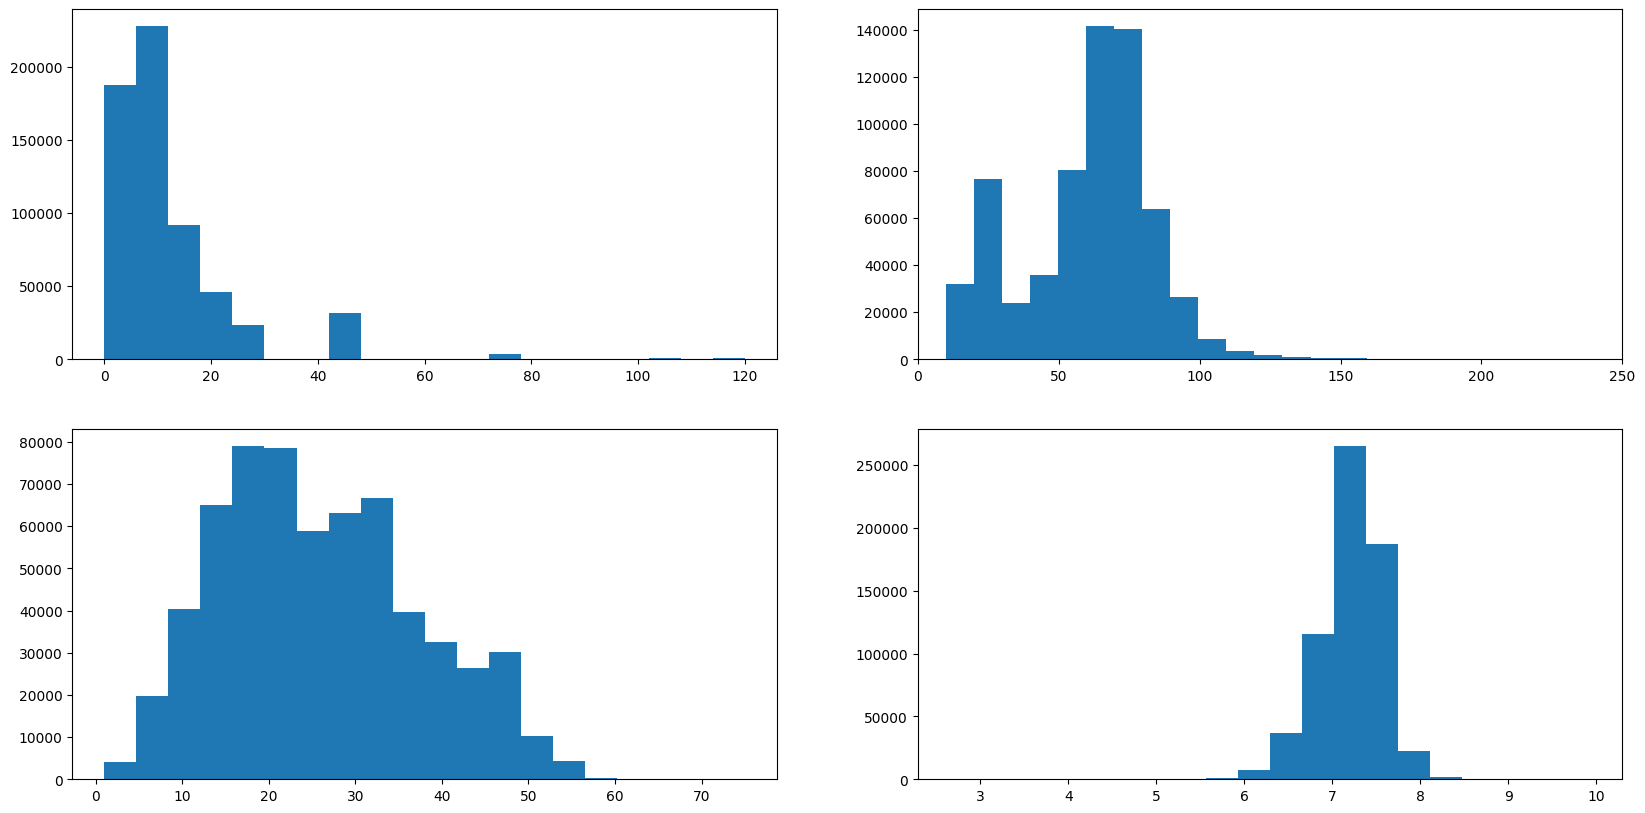

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
axes[0][0].hist(df["最寄駅：距離（分）"],bins = 20)
axes[0][1].hist(df["面積（㎡）"],bins = 200)
axes[0][1].set_xlim(0,250)
axes[1][0].hist(df["建築年"],bins = 20)
axes[1][1].hist(df["取引価格（総額）_log"],bins = 20)
plt.show()

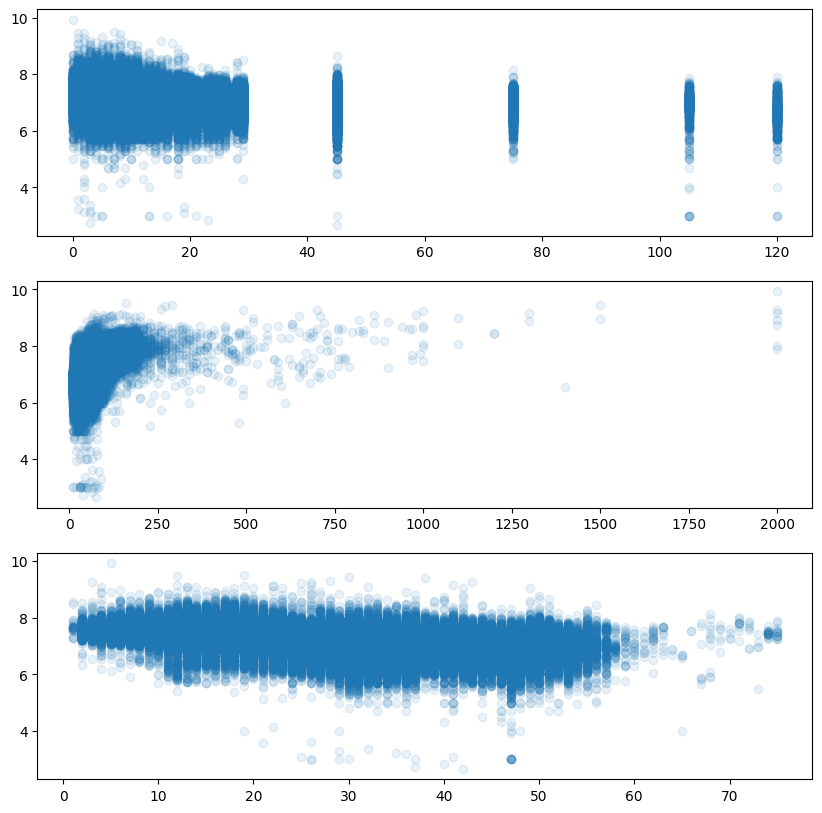

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
axes[0].scatter(df["最寄駅：距離（分）"],df["取引価格（総額）_log"],alpha=0.1)
axes[1].scatter(df["面積（㎡）"],df["取引価格（総額）_log"],alpha=0.1)
axes[2].scatter(df["建築年"],df["取引価格（総額）_log"],alpha=0.1)

In [25]:
df[['取引価格（総額）_log',"最寄駅：距離（分）","面積（㎡）","建築年"]].corr()

,取引価格（総額）_log,最寄駅：距離（分）,面積（㎡）,建築年
取引価格（総額）_log,1.000000,-0.215520,0.382755,-0.541508
最寄駅：距離（分）,-0.215520,1.000000,0.151880,0.118339
面積（㎡）,0.382755,0.151880,1.000000,-0.067965
建築年,-0.541508,0.118339,-0.067965,1.000000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=039e71b60e6cf1e5015e95103019c8c6588185b61d8e1270c0d9c40f12167034
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32207 (\N{CJK UNIFIED IDEOGRAPH-7DCF}) missing from current font.
  fig.canvas.draw()
/usr

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 32207 (\N{CJK UNIFIED IDEOGRAPH-7D

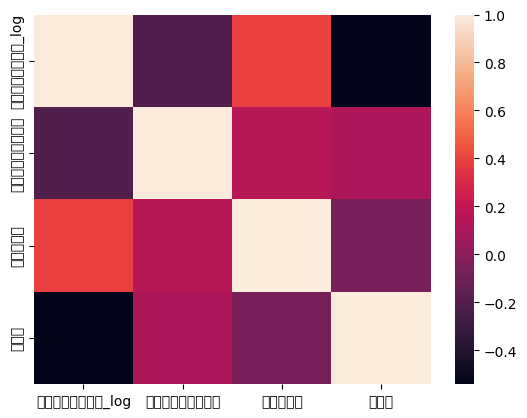

In [29]:
import matplotlib
!pip install japanize-matplotlib
import japanize_matplotlib
matplotlib.rcParams["font.family"] = "AppleGothic"
sns.heatmap(df[['取引価格（総額）_log',"最寄駅：距離（分）","面積（㎡）","建築年"]].corr())

<Axes: xlabel='取引時点', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRA

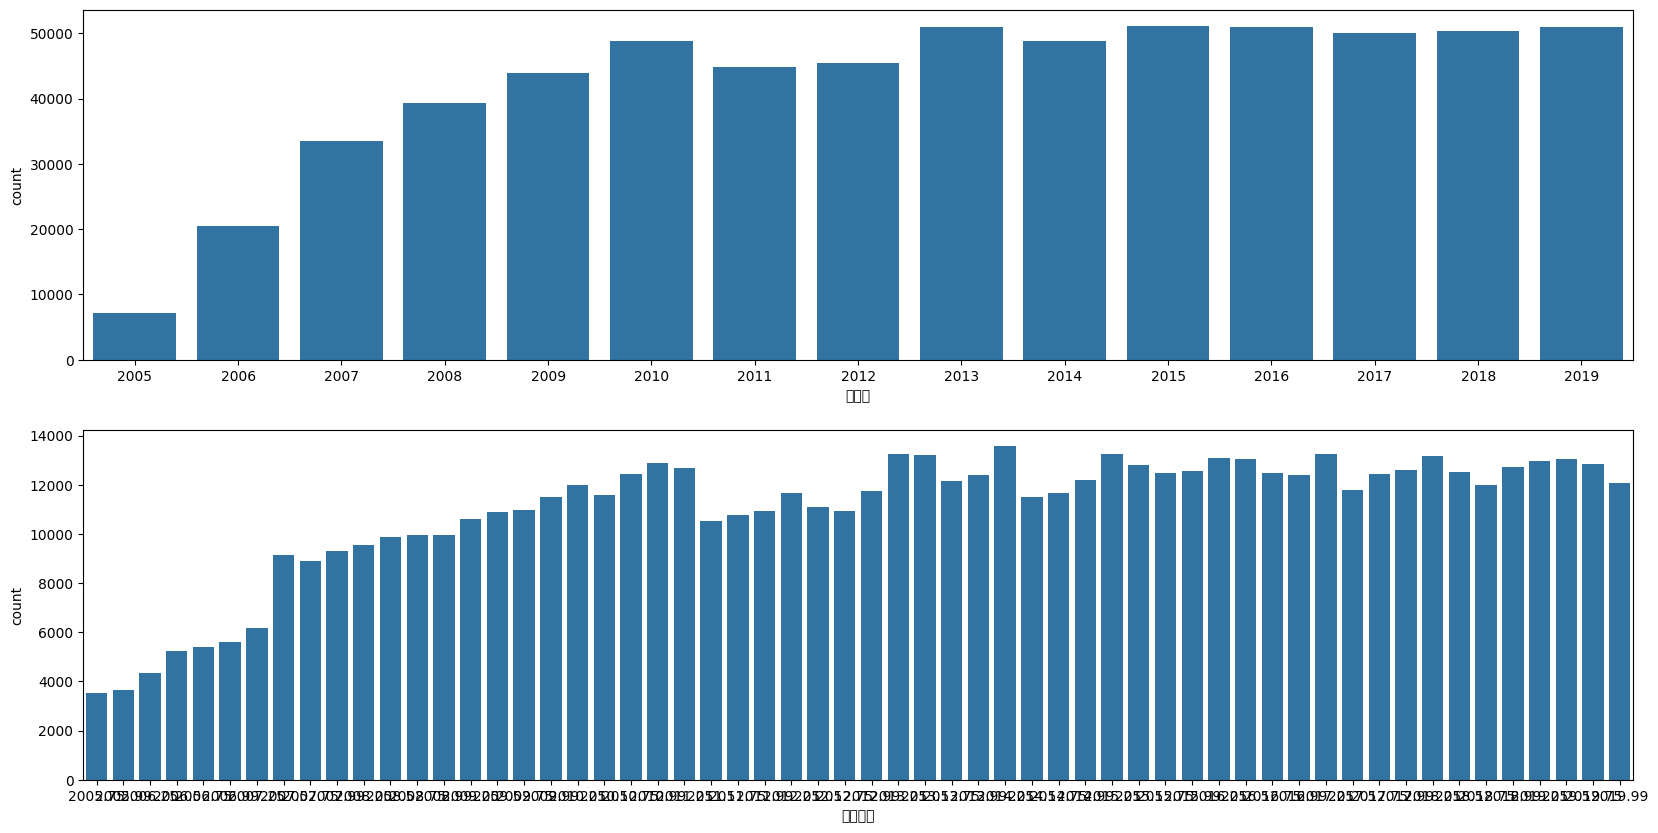

In [30]:
df["取引年"] = df["取引時点"].apply(lambda x:str(x)[:4])
fig, axes = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(x="取引年", data=df.sort_values("取引年"),ax=axes[0])
sns.countplot(x="取引時点",data=df, ax = axes[1])







### モデル構築

In [53]:
files = glob.glob('/content/drive/MyDrive/Colab Notebooks/data/train/train/*.csv')
data_list = []
for file in files:
    data_list.append(pd.read_csv(file,index_col=0))
df = pd.concat(data_list)


<ipython-input-53-74075052e136>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file,index_col=0))
<ipython-input-53-74075052e136>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file,index_col=0))


In [54]:
def data_pre(df):

    nonnull_list = []
    for col in df.columns:
        nonnull = df[col].count()
        if nonnull == 0:
            nonnull_list.append(col)

    df = df.drop(nonnull_list,axis=1)

    df = df.drop("市区町村名",axis=1)

    df = df.drop("種類",axis=1)

    dis ={"30分?60分":45,
        "1H?1H30":75,
        "1H30?2H":105,
        "2H?":120}
    df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].replace(dis).astype(float)

    df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上",2000).astype(float)

    y_list = {}

    for i in df["建築年"].value_counts().keys():
        if "平成" in i:
            num =float( i.split("平成")[1].split("年")[0])
            year = 33 - num
        if "令和" in i:
            num =float( i.split("令和")[1].split("年")[0])
            year = 3 - num
        if "昭和" in i:
            num =float( i.split("昭和")[1].split("年")[0])
            year = 96 - num
        y_list[i] = year
    y_list['戦前'] = 76
    df['建築年'] = df["建築年"].replace(y_list)

    year = {"年第１四半期":".25",
            "年第２四半期":".50",
            "年第３四半期":".75",
            "年第４四半期":".99"
    }
    year_list = {}
    for i in df["取引時点"].value_counts().keys():
        for k,j in year.items():
            if k in i:
                year_rep = i.replace(k,j)
        year_list[i] = year_rep
    year_list
    df["取引時点"] = df["取引時点"].replace(year_list).astype(float)

    for cal in ('都道府県名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途' , '今後の利用目的', '都市計画', '改装', '取引の事情等'):
        df[cal] = df[cal].astype('category')

    return df

In [55]:
df = data_pre(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637351 entries, 16008302 to 2029043
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   市区町村コード       637351 non-null  int64   
 1   都道府県名         637351 non-null  category
 2   地区名           637060 non-null  category
 3   最寄駅：名称        634732 non-null  category
 4   最寄駅：距離（分）     614306 non-null  float64 
 5   間取り           615609 non-null  category
 6   面積（㎡）         637351 non-null  float64 
 7   建築年           619117 non-null  float64 
 8   建物の構造         623423 non-null  category
 9   用途            591214 non-null  category
 10  今後の利用目的       275091 non-null  category
 11  都市計画          618786 non-null  category
 12  建ぺい率（％）       614848 non-null  float64 
 13  容積率（％）        614848 non-null  float64 
 14  取引時点          637351 non-null  float64 
 15  改装            580431 non-null  category
 16  取引の事情等        18275 non-null   category
 17  取引価格（総額）_log  637351 non-n

### Light GBM

In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [57]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=0)

col = "取引価格（総額）_log"
train_y = df_train[col]
train_x = df_train.drop(col, axis=1)

val_y = df_val[col]
val_x = df_val.drop(col, axis=1)

trains = lgb.Dataset(train_x, train_y)
valids = lgb.Dataset(val_x, val_y)

In [58]:
#パラメータの設定
params = {
    "objective": "regression",
    "metrics": "mae"
}


In [59]:
#過学習を防ぐために、early_stopping
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000)

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11677
[LightGBM] [Info] Number of data points in the train set: 509880, number of used features: 17
[LightGBM] [Info] Start training from score 7.217325


In [63]:
#念のため、確認
vals = model.predict(val_x)
mae(vals, val_y)

0.07672929322189803

In [64]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv', index_col=0)
df_test = data_pre(df_test)

In [66]:
predict = model.predict(df_test)
df_test['取引価格（総額）_log'] = predict
df_test['取引価格（総額）_log']

,取引価格（総額）_log
ID,
1000000,6.994883
1000056,7.579658
1000108,6.554165
1000109,7.083036
1000110,6.543316
...,...
47003828,7.639950
47003829,7.316227
47003880,7.155946


In [67]:
df_test[['取引価格（総額）_log']].to_csv('submission.csv')